## Измерение сходства узлов на основе представления графа

В графовых нейронных сетях (Graph Neural Networks, GNN) одним из важных аспектов является измерение сходства между узлами графа.

Node Similarity представляет собой меру близости или похожести между двумя узлами графа. Измерение сходства узлов основывается на их представлениях в графе.
Схожесть узлов (Node Similarity) в графовых сетях представляет собой меру близости или похожести между двумя узлами графа. Измерение сходства узлов основывается на их представлениях в графе. Это понятие играет важную роль в анализе графов, так как позволяет выявлять связи и паттерны между узлами.

Когда речь идет о измерении схожести узлов в графовых сетях, можно использовать различные метрики. Три такие распространенные метрики — это Косинусная схожесть (Cosine Similarity), Манхэттенское расстояние (Manhattan Distance) и Евклидово расстояние (Euclidean Distance).


### Примеры метрик схожести узлов:

**Косинусная схожесть** (Cosine Similarity):


> Измеряет угол между векторами признаков узлов в графе, представляя их как многомерные векторы.

> $Cosine(A, B) = (Σ (A_i * B_i)) / (\sqrt(Σ A_i^2) * \sqrt(Σ B_i^2)), где A_i и B_i$ - значения признаков узлов.

**Манхэттенское расстояние** (Manhattan Distance):

> Измеряет сумму абсолютной разницы между соответствующими координатами узлов на графе.

> $Manh(A, B) = Σ |A_i - B_i|, где A_i и B_i$ - координаты узлов по каждой из размерностей.

**Евклидово расстояние** (Euclidean Distance):


> Измеряет расстояние между двумя узлами в графе, представляя их как точки в пространстве.

> $Euclid(A, B) = sqrt(Σ (A_i - B_i)^2), где A_i и B_i$ - координаты узлов по каждой из размерностей.




Использование этих метрик расстояния позволяет оценить геометрическое расположение узлов в графе.













### Установка зависимостей


Устанавливаем необходимые для работы зависимости

In [2]:
!pip install pykeen networkx matplotlib

Далее, импортируем необходимых модулей

In [3]:
import torch
import pykeen
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pykeen.pipeline import pipeline
from sklearn.neighbors import NearestNeighbors
from pykeen.evaluation import RankBasedEvaluator
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances

INFO:pykeen.utils:Using opt_einsum


Здесь мы устанавливаем необходимые библиотеки и импортируем модули, которые будут использоваться в лабораторной работе.

## Взаимодействие с графовым датасетом и описание данных





Мы импортируем модуль datasets из Pykeen для работы с графовыми датасетами.

In [4]:
from pykeen.datasets import Countries

Загружаем графовый датасет Countries из Pykeen. В результате выполнения этой команды будет создан объект, представляющий графовый датасет.

In [5]:
countries_dataset = Countries()

Мы можем вывести описание датасета, чтобы получить информацию о количестве сущностей, отношений и других характеристиках.

In [6]:
# Просмотр описания датасета
print(countries_dataset)

Countries(training_path="/root/.data/pykeen/datasets/countries/train.txt", testing_path="/root/.data/pykeen/datasets/countries/test.txt", validation_path="/root/.data/pykeen/datasets/countries/valid.txt")


## Обучение модели


Использеум pipeline() предоставляемый пакетом pykeen для обучения модели, в качестве аргументов указываем тип модели, набор данных, количество эпох обучения и устройство на котором проводится обучений

Проверяем наличие GPU устройства и вызываем функцию pipeline(), которая запускает процесс обучения модели, тестирования и валидации.

In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [21]:
complex_pipeline_results = pipeline(
    model="ComplEx",
    dataset=countries_dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds


In [19]:
# Задаем параметры для pipeline
pipeline_results = pipeline(
    model="HolE",
    dataset=countries_dataset,
    training_kwargs=dict(num_epochs=100),
    device=device
)

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/5 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.12s seconds



В PyKEEN, функция plot_losses используется для визуализации изменения значений функции потерь во времени (по эпохам) в процессе обучения модели. Эта функция часто используется для мониторинга производительности модели во время тренировки и может быть полезной для оценки, насколько хорошо модель учится на обучающем наборе данных.


<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

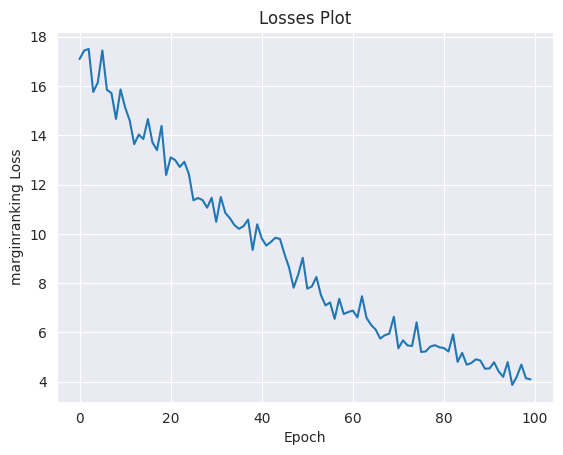

In [22]:
complex_model = complex_pipeline_results.model

complex_pipeline_results.plot_losses()

<Axes: title={'center': 'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

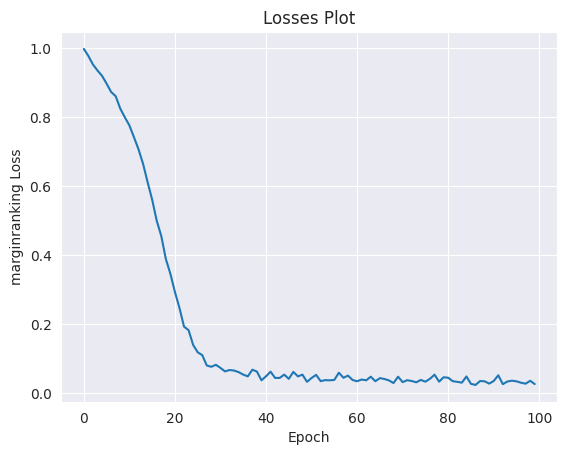

In [20]:
# Обученная модель хранится в pipeline_results
model = pipeline_results.model

#plot loss
pipeline_results.plot_losses()

## Метрики оценки работы модели

В PyKEEN пакет metrics предоставляет реализацию различных метрик, которые могут быть использованы для оценки качества работы моделей знаний (knowledge graph embedding models). Эти метрики позволяют оценивать, насколько хорошо модель справляется с предсказанием троек в графе знаний.

Некоторые из основных метрик, доступных в пакете metrics:

*   Rank-based Metrics - которые измеряют позицию верного ответа (положительной тройки) в отсортированном списке всех возможных троек
*   Top-K Metrics - которые оценивают качество предсказаний в топ-K результатах.
*   Clustering Metrics - которые измеряют качество кластеризации.

Рассчитаем некоторые из них далее.

In [23]:
# Создаем evaluator объект
evaluator = RankBasedEvaluator()

# Оценить работу модели
metrics = evaluator.evaluate(pipeline_results.model, countries_dataset.testing.mapped_triples,
                             additional_filter_triples=[countries_dataset.training.mapped_triples,
                                                        countries_dataset.validation.mapped_triples])

# Print the metrics
print(f"Hits@1: {metrics.get_metric('hits@1')}")
print(f"Hits@3: {metrics.get_metric('hits@3')}")
print(f"Hits@5: {metrics.get_metric('hits@5')}")
print(f"Hits@10: {metrics.get_metric('hits@10')}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank')}")

INFO:pykeen.evaluation.evaluator:Starting batch_size search for evaluation now...
INFO:pykeen.evaluation.evaluator:Concluded batch_size search with batch_size=24.


Evaluating on cuda:0:   0%|          | 0.00/24.0 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.09s seconds


Hits@1: 0.0625
Hits@3: 0.3333333333333333
Hits@5: 0.4583333333333333
Hits@10: 0.5833333333333334
Mean Reciprocal Rank: 0.2344350665807724


## Получение представлений узлов

После того как модель обучена, мы можем полчить представления узлов и отношений из результатов работы пайплайна.

In [24]:
node_embeddings = pipeline_results.model.entity_representations

embedding_matrix = node_embeddings[0]._embeddings.weight.data

# Конвертируем матрицу весов в NumPy array
embedding_numpy = embedding_matrix.cpu().numpy()

Мы извлекаем представления узлов из обученной модели. В этом контексте, представления узлов - это векторы, представляющие сущности в графе.


Далее извлечем лейблы для сущнойстей и визуализируем некоторые из сущностей на плоскости.

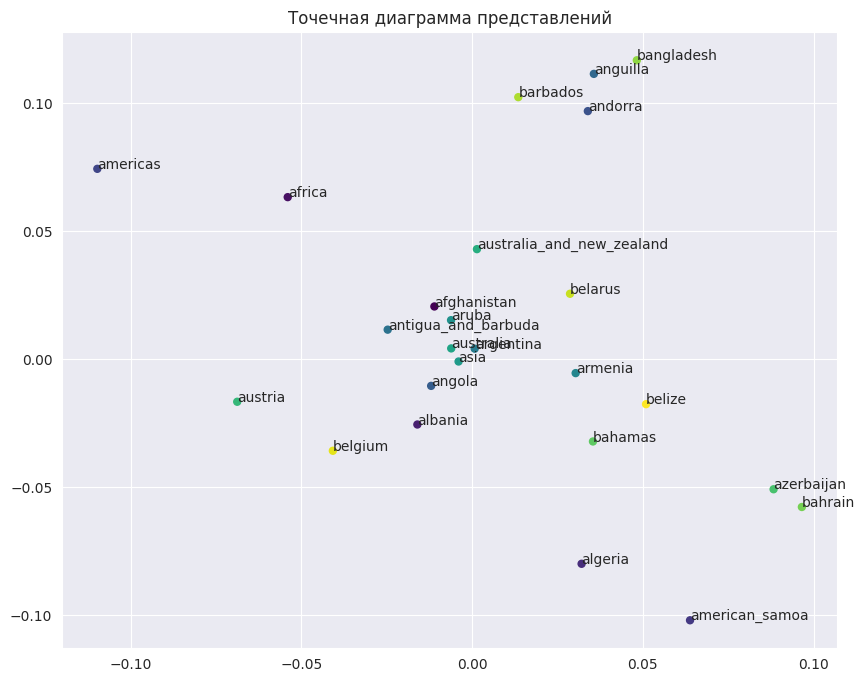

In [25]:
#Созраняем названия сущностей в отдельной переменной
id_to_lable = list(countries_dataset.testing.entity_id_to_label.values())

def visualize_embeddings(embeddings, labels):
    # Scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c=np.arange(len(labels)), cmap='viridis', s=25)

    # Добавляем лейблы к точкаи на графике
    for i, label in enumerate(labels):
        plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), alpha=1)

    plt.title('Точечная диаграмма представлений')
    plt.show()

#Количество точек которые необходимо отобразить на графике
number = 25

visualize_embeddings(embedding_numpy[:number], id_to_lable[:number])

Мы используем NetworkX и Matplotlib для визуализации представлений узлов на графе. Каждая сущность представлена точкой в двумерном пространстве, и близкие точки соответствуют похожим узлам в графе.


## Измерение Node Similarity

Добавим код для измерения близости узлов на основе представлений. Расчитаем близость между несколькими случайными узлами. Используем для этого косинусную схожесть, манхэттенское и евклидово расстояние. Визуализируем полученные результаты как матрицу близости.


[[0.        1.4493912 1.4004773 1.4028665]
 [1.4493912 0.        1.4396825 1.2529458]
 [1.4004773 1.4396825 0.        1.4519808]
 [1.4028665 1.2529458 1.4519808 0.       ]]


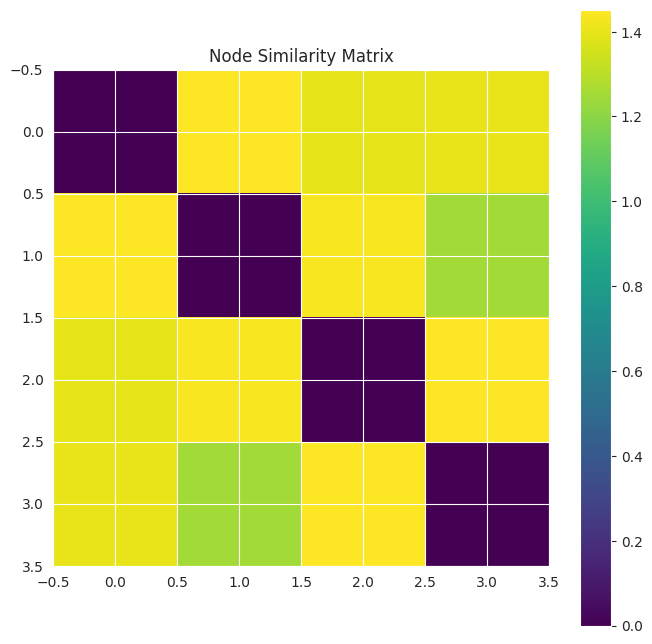

[[ 0.9999998  -0.0503675   0.0193317   0.00980258]
 [-0.0503675   0.9999998  -0.03634287  0.21013753]
 [ 0.0193317  -0.03634287  1.0000001  -0.06074592]
 [ 0.00980258  0.21013753 -0.06074592  1.0000001 ]]


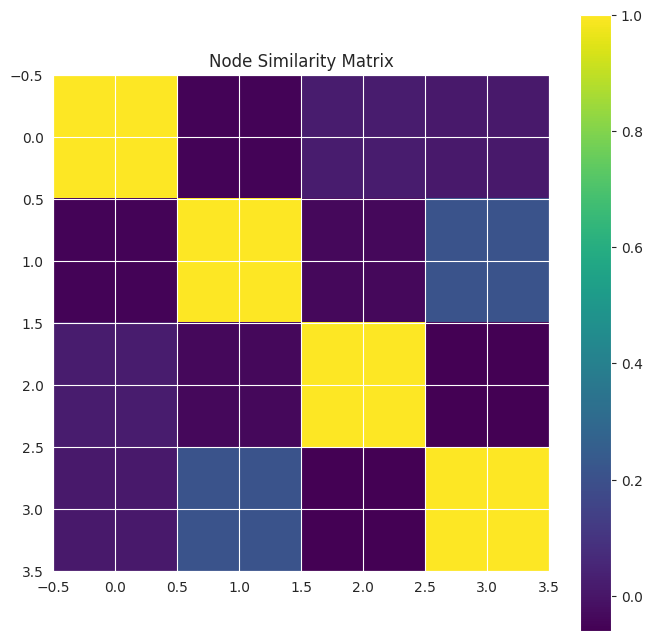

[[ 0.         16.58460729 16.2880182  16.58967177]
 [16.58460729  0.         17.1070516  14.31993435]
 [16.2880182  17.1070516   0.         16.62799908]
 [16.58967177 14.31993435 16.62799908  0.        ]]


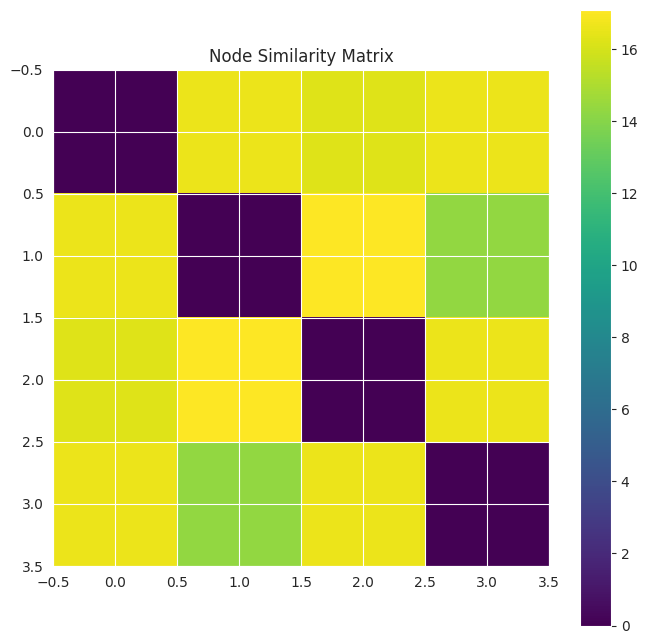

In [26]:
def diplay_matrix(similarity_matrix):
  # Визуализация матрицы близости
  plt.figure(figsize=(8, 8))
  plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
  plt.colorbar()
  plt.title('Node Similarity Matrix')
  plt.show()


# Рассчет близости между узлами
methods = [euclidean_distances,cosine_similarity,manhattan_distances]
#Узлы
nodes = [embedding_numpy[4],embedding_numpy[12],embedding_numpy[89],embedding_numpy[172]]
for method in methods:
  similarity_matrix = method(nodes)
  print(similarity_matrix)
  diplay_matrix(similarity_matrix)

Этот код использует euclidean_distances,cosine_similarity и manhattan_distances из scikit-learn для вычисления матрицы близости между узлами на основе их представлений. Затем мы визуализируем эту матрицу для наглядного представления Node Similarity.

## Поиск соседей узла
Одной из задач где используется схожесть узлов является задача поиска ближайших соседей конкретного узла в графе.
Рассмотрии применение NearestNeighbors на созданных представлениях с использованием только что рассмотренных методов рассчета близости.

In [27]:
# Выбираем случайный узел
random_node_index = 137
methods = ['nan_euclidean','cosine','manhattan']
def nearest_nodes(method):
  nn_model = NearestNeighbors(n_neighbors=4, metric=method)
  nn_model.fit(embedding_numpy)
  distances, indices = nn_model.kneighbors([embedding_numpy[random_node_index]])
  print('Метрика:'+method )
  print(f'Дистанции:{distances}' )
  print(f'Индексы:{indices}' )
  # Визуализация ближайших соседей
  neighbors_labels = [id_to_lable[i] for i in indices.flatten()]
  print(f"Ближайшие соседи узла {id_to_lable[random_node_index]}: {neighbors_labels} \n")

for method in methods: nearest_nodes(method)

Метрика:nan_euclidean
Дистанции:[[0.        1.0903572 1.118454  1.1588001]]
Индексы:[[137 269 157 146]]
Ближайшие соседи узла malawi: ['malawi', 'zimbabwe', 'mozambique', 'mayotte'] 

Метрика:cosine
Дистанции:[[0.         0.61571884 0.6513709  0.68722314]]
Индексы:[[137 269 157 146]]
Ближайшие соседи узла malawi: ['malawi', 'zimbabwe', 'mozambique', 'mayotte'] 

Метрика:manhattan
Дистанции:[[ 0.         12.35087872 12.95176506 12.96697903]]
Индексы:[[137 269 157 237]]
Ближайшие соседи узла malawi: ['malawi', 'zimbabwe', 'mozambique', 'tanzania'] 



Этот код использует NearestNeighbors из scikit-learn для поиска ближайших соседей случайного узла в графе. Мы выводим метки ближайших соседей и дистанции до них.